<a href="https://colab.research.google.com/github/Moubarack-diop/Chatbot/blob/main/Recuperation_pretraitement_donnees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Recuperation et pretraitement des donnees

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Fonction pour extraire des questions, réponses, catégories, vidéos, et fichiers PDF sur plusieurs pages
def extract_questions_answers_categories(base_url, num_pages):
    all_data = []  # Liste pour stocker toutes les questions, réponses, catégories, vidéos et fichiers PDF

    for page in range(1, num_pages + 1):
        # Générer l'URL de chaque page de questions
        page_url = f"{base_url}?page={page}&utf8=%E2%9C%93&with_category%5B%5D=3070"
        response = requests.get(page_url)
        soup = BeautifulSoup(response.content, 'html.parser')

        # Récupérer les liens des questions
        question_elements = soup.select('li.questions-content h3 a')
        question_links = [element['href'] for element in question_elements]

        # Pour chaque lien de question, extraire les informations
        for link in question_links:
            question_url = f"https://assistance.orange.sn{link}"
            response = requests.get(question_url)
            question_soup = BeautifulSoup(response.content, 'html.parser')

            try:
                # Récupérer la question
                question_element = question_soup.select_one('h1 a')
                question_text = question_element.text.strip() if question_element else None

                # Récupérer la réponse
                answer_element = question_soup.select_one('div.answer .body-bd')
                answer_text = answer_element.text.strip() if answer_element else None

                # Récupérer la catégorie
                category_element = question_soup.select_one('dl.category dd a')
                category_text = category_element.text.strip() if category_element else None

                # Récupérer les vidéos
                video_elements = question_soup.select('a.attachment-link')
                video_links = [video['href'] for video in video_elements if ".mov" in video['href'] or ".mp4" in video['href']]

                # Récupérer les fichiers PDF
                pdf_links = [pdf['href'] for pdf in video_elements if ".pdf" in pdf['href']]

                # Ajouter les données collectées à la liste
                all_data.append({
                    'question_link': question_url,
                    'question': question_text,
                    'answer': answer_text,
                    'category': category_text,
                    'video_links': video_links,
                    'pdf_links': pdf_links
                })

            except Exception as e:
                print(f"Erreur lors de l'extraction des données pour le lien: {question_url} - {e}")

    return all_data

# Base URL des pages de questions
base_url = 'https://assistance.orange.sn/questions/browse'

# Nombre de pages à parcourir
num_pages = 50

# Récupérer les données pour les pages spécifiées
all_data = extract_questions_answers_categories(base_url, num_pages)

# Afficher les données dans un DataFrame
df = pd.DataFrame(all_data, columns=['question_link', 'question', 'answer', 'video_links', 'pdf_links', 'category'])
df


,question_link,question,answer,video_links,pdf_links,category
0,https://assistance.orange.sn/questions/3251287...,Formulaire Orange,Formulaire abonnement Fibre Orange \n\n 22080...,[],[https://dimelo-answers-production.s3.eu-west-...,Internet et fixe
1,https://assistance.orange.sn/questions/3182069...,Guide d'utilisation #1413# Orange Senegal,Guide d'utilisation #1413# Orange Senegal \n\n...,[],[https://dimelo-answers-production.s3.eu-west-...,Internet et fixe
2,https://assistance.orange.sn/questions/3051587...,Comment activer la garantie Samsung E Warranty,Pour s’enregistrer sur Ewarranty afin de bénéf...,[],[],TV d'orange et contenus
3,https://assistance.orange.sn/questions/3043480...,Contacter le SAMU 1515 sur Iphone,"Désormais, c’est possible pour tout client uti...",[],[],Entre nous
4,https://assistance.orange.sn/questions/3038189...,Orange Energie avec Kit wifi (Box bi),Orange offre la possibilité aux habitants des ...,[],[],Internet et fixe
...,...,...,...,...,...,...
495,https://assistance.orange.sn/questions/2533073...,SMS Suivi Conso Orange: Comment désactiver?,"Pour désactiver les messages de suivi Conso, i...",[],[],Offres mobiles
496,https://assistance.orange.sn/questions/2533072...,Service FFC orange : Comment se désabonner ?,"Pour désactiver les SMS FFC de Orange, il faut...",[],[],Offres mobiles
497,https://assistance.orange.sn/questions/2533071...,Comment désactiver les SMS de Jeu Orange?,Pour désactiver les SMS Jeu (Megawin Paris Spo...,[],[],Offres mobiles
498,https://assistance.orange.sn/questions/2526291...,Partenariat Orange Money – ACEP,OFMS (Orange Money) et ACEP vous proposent l’o...,[],[],Orange Money


On utilise les librairies requests, BeautifulSoup et pandas pour extraire des informations (questions, réponses, catégories, liens vidéo et PDF) depuis le site web https://assistance.orange.sn. Il parcourt un nombre spécifié de pages, récupère le contenu HTML de chaque page, et utilise BeautifulSoup pour identifier et extraire les données souhaitées. Les informations extraites sont stockées dans une liste, puis converties en un DataFrame pandas pour une visualisation et une manipulation aisées.

In [31]:
def format_answer_with_link(df):
    # Formater la colonne 'answer' avec la réponse et le lien de la question
    df['answer'] = df['answer'] + " Pour plus d'information, cliquez sur ces liens: " + df['question_link']
    return df

df1 = format_answer_with_link(df)
df1

,question_link,question,answer,video_links,pdf_links,category
0,https://assistance.orange.sn/questions/3251287...,Formulaire Orange,Formulaire abonnement Fibre Orange \n\n 22080...,[],[https://dimelo-answers-production.s3.eu-west-...,Internet et fixe
1,https://assistance.orange.sn/questions/3182069...,Guide d'utilisation #1413# Orange Senegal,Guide d'utilisation #1413# Orange Senegal \n\n...,[],[https://dimelo-answers-production.s3.eu-west-...,Internet et fixe
2,https://assistance.orange.sn/questions/3051587...,Comment activer la garantie Samsung E Warranty,Pour s’enregistrer sur Ewarranty afin de bénéf...,[],[],TV d'orange et contenus
3,https://assistance.orange.sn/questions/3043480...,Contacter le SAMU 1515 sur Iphone,"Désormais, c’est possible pour tout client uti...",[],[],Entre nous
4,https://assistance.orange.sn/questions/3038189...,Orange Energie avec Kit wifi (Box bi),Orange offre la possibilité aux habitants des ...,[],[],Internet et fixe
...,...,...,...,...,...,...
495,https://assistance.orange.sn/questions/2533073...,SMS Suivi Conso Orange: Comment désactiver?,"Pour désactiver les messages de suivi Conso, i...",[],[],Offres mobiles
496,https://assistance.orange.sn/questions/2533072...,Service FFC orange : Comment se désabonner ?,"Pour désactiver les SMS FFC de Orange, il faut...",[],[],Offres mobiles
497,https://assistance.orange.sn/questions/2533071...,Comment désactiver les SMS de Jeu Orange?,Pour désactiver les SMS Jeu (Megawin Paris Spo...,[],[],Offres mobiles
498,https://assistance.orange.sn/questions/2526291...,Partenariat Orange Money – ACEP,OFMS (Orange Money) et ACEP vous proposent l’o...,[],[],Orange Money


On définit une fonction appelée format_answer_with_link qui prend un DataFrame pandas comme entrée. Cette fonction modifie la colonne 'answer' du DataFrame en ajoutant le lien de la question à la fin de chaque réponse. Plus précisément, elle ajoute la phrase "Pour plus d'information, cliquez sur ces liens:" suivie du lien de la question, à chaque réponse dans le DataFrame. La fonction retourne ensuite le DataFrame modifié.

In [32]:
df1=df1.copy()

In [35]:
df1.describe()

,question_link,question,answer,video_links,pdf_links,category
count,500,500,500,500,500,500
unique,500,500,500,11,10,9
top,https://assistance.orange.sn/questions/2526011...,Orange Sargal : Comment convertir vos points e...,"Avec votre application Orange et Moi, vous con...",[],[],Offres mobiles
freq,1,1,1,490,491,144


La commande data.describe() appliqué au DataFrame data fournit un résumé statistique des données textuelles qu'il contient. Chaque colonne analysée ("question_link", "question", "answer", "video_links", "pdf_links", "category") possède 500 entrées, sans valeurs manquantes. L'analyse révèle une forte unicité des questions, réponses et liens de questions, suggérant l'absence de doublons. En revanche, les liens vidéo et PDF présentent moins de valeurs uniques, indiquant une association possible à plusieurs questions. La catégorie "Offres mobiles" est la plus fréquente, apparaissant 144 fois. En somme, ce résumé statistique donne un aperçu global de la diversité et de la distribution des données dans le DataFrame.

# Filtrer les questions sans réponses


In [36]:
# Filtrer les questions sans réponses
no_answer_data = df1[df1['answer'].isnull() | (df1['answer'] == '')]

# Nombre de questions sans réponse
print("Nombre de questions sans réponse :", len(no_answer_data))

Nombre de questions sans réponse : 0


On cherche à identifier et quantifier les questions sans réponse dans le DataFrame. On utilise le filtrage booléen de pandas pour sélectionner les lignes où la colonne 'answer' est soit nulle `(isnull())`, soit une chaîne de caractères vide `(== '')`. Ces lignes sont stockées dans un nouveau DataFrame appelé no_answer_data. Enfin, on affiche le nombre de questions sans réponse en utilisant la fonction `len()` sur ce nouveau DataFrame.

# Supprimer les lignes où la colonne 'video_links' contient des liens (listes non vides)


In [37]:
# Supprimer les lignes où la colonne 'video_links' contient des liens (listes non vides)
df1= df1[df1['video_links'].str.len() == 0]


On supprime du DataFrame data toutes les lignes (questions) qui ont des liens vidéo dans la colonne 'video_links'. Il filtre le DataFrame pour ne garder que les lignes où la colonne 'video_links' est une liste vide, signifiant l'absence de liens vidéo.

# Supprimer les lignes où la question est la meme que la reponse

In [38]:
df1= df1[df1['question'] != df1['answer']]

In [39]:
df1.describe()

,question_link,question,answer,video_links,pdf_links,category
count,490,490,490,490,490,490
unique,490,490,490,1,10,9
top,https://assistance.orange.sn/questions/2526011...,Orange Sargal : Comment convertir vos points e...,"Avec votre application Orange et Moi, vous con...",[],[],Offres mobiles
freq,1,1,1,490,481,141


In [40]:
# Filtrer les lignes où 'video_links' ou 'pdf_links' ne sont pas vides
filtered_df = df1[(df1['video_links'].str.len() > 0) | (df1['pdf_links'].str.len() > 0)]

# Afficher le DataFrame filtré
filtered_df


,question_link,question,answer,video_links,pdf_links,category
0,https://assistance.orange.sn/questions/3251287...,Formulaire Orange,Formulaire abonnement Fibre Orange \n\n 22080...,[],[https://dimelo-answers-production.s3.eu-west-...,Internet et fixe
1,https://assistance.orange.sn/questions/3182069...,Guide d'utilisation #1413# Orange Senegal,Guide d'utilisation #1413# Orange Senegal \n\n...,[],[https://dimelo-answers-production.s3.eu-west-...,Internet et fixe
202,https://assistance.orange.sn/questions/2764640...,Formulaire de Cession Orange : Comment le télé...,"Vous êtes titulaire d'un abonnement mobile, in...",[],[https://dimelo-answers-production.s3.eu-west-...,Entre nous
203,https://assistance.orange.sn/questions/2764639...,Formulaire de procuration Orange : Comment le ...,La procuration permet à une tierce personne de...,[],[https://dimelo-answers-production.s3.eu-west-...,Entre nous
220,https://assistance.orange.sn/questions/2749390...,Comment faire une demande d'annulation suite à...,Pour faire une demande correction suite à erre...,[],[https://dimelo-answers-production.s3.eu-west-...,Orange Money
248,https://assistance.orange.sn/questions/2730086...,Ouverture compte Orange Money pour une personn...,● Remplir le bulletin de souscription (f...,[],[https://dimelo-answers-production.s3.eu-west-...,Orange Money
302,https://assistance.orange.sn/questions/2696783...,Comment modifier les données d'un compte Orang...,Pour mettre à jour les données de votre compte...,[],[https://dimelo-answers-production.s3.eu-west-...,Orange Money
303,https://assistance.orange.sn/questions/2696781...,Comment résilier un compte Orange Money?,"Pour résilier un compte Orange Money, il vous ...",[],[https://dimelo-answers-production.s3.eu-west-...,Orange Money
492,https://assistance.orange.sn/questions/2538224...,Orange Money Sénégal: Corriger erreur transfer...,Les applications Orange Money et Orange et Moi...,[],[https://dimelo-answers-production.s3.eu-west-...,Orange Money


Ce code filtre le Dataframe data pour ne garder que les lignes contenant un lien vidéo ou PDF. Il vérifie si les colonnes 'video_links' ou 'pdf_links' contiennent du texte, indiquant la présence d'un lien. Les lignes sélectionnées sont stockées dans filtered_df et affichées.

In [41]:
filtered_df.describe()

,question_link,question,answer,video_links,pdf_links,category
count,9,9,9,9,9,9
unique,9,9,9,1,9,3
top,https://assistance.orange.sn/questions/3251287...,Formulaire Orange,Formulaire abonnement Fibre Orange \n\n 22080...,[],[https://dimelo-answers-production.s3.eu-west-...,Orange Money
freq,1,1,1,9,1,5


# Concaténer les liens PDF à la reponse

In [42]:
# Fonction pour concaténer les liens PDF à la reponse
def concatenate_pdfs_to_answer(row):
    if len(row['pdf_links']) > 0:  # Si la liste 'pdf_links' n'est pas vide
        pdf_text = "pièces jointes: " + ", ".join(row['pdf_links'])  # Concatenation des liens avec "pièces jointes"
        return row['answer'] + " " + pdf_text  # Concaténer à la reponse
    return row['answer']  # Sinon, retourner la reponse telle quelle

# Appliquer la fonction à chaque ligne
df1['answer'] = df1.apply(concatenate_pdfs_to_answer, axis=1)

# Afficher le DataFrame mis à jour
df1


,question_link,question,answer,video_links,pdf_links,category
0,https://assistance.orange.sn/questions/3251287...,Formulaire Orange,Formulaire abonnement Fibre Orange \n\n 22080...,[],[https://dimelo-answers-production.s3.eu-west-...,Internet et fixe
1,https://assistance.orange.sn/questions/3182069...,Guide d'utilisation #1413# Orange Senegal,Guide d'utilisation #1413# Orange Senegal \n\n...,[],[https://dimelo-answers-production.s3.eu-west-...,Internet et fixe
2,https://assistance.orange.sn/questions/3051587...,Comment activer la garantie Samsung E Warranty,Pour s’enregistrer sur Ewarranty afin de bénéf...,[],[],TV d'orange et contenus
3,https://assistance.orange.sn/questions/3043480...,Contacter le SAMU 1515 sur Iphone,"Désormais, c’est possible pour tout client uti...",[],[],Entre nous
4,https://assistance.orange.sn/questions/3038189...,Orange Energie avec Kit wifi (Box bi),Orange offre la possibilité aux habitants des ...,[],[],Internet et fixe
...,...,...,...,...,...,...
495,https://assistance.orange.sn/questions/2533073...,SMS Suivi Conso Orange: Comment désactiver?,"Pour désactiver les messages de suivi Conso, i...",[],[],Offres mobiles
496,https://assistance.orange.sn/questions/2533072...,Service FFC orange : Comment se désabonner ?,"Pour désactiver les SMS FFC de Orange, il faut...",[],[],Offres mobiles
497,https://assistance.orange.sn/questions/2533071...,Comment désactiver les SMS de Jeu Orange?,Pour désactiver les SMS Jeu (Megawin Paris Spo...,[],[],Offres mobiles
498,https://assistance.orange.sn/questions/2526291...,Partenariat Orange Money – ACEP,OFMS (Orange Money) et ACEP vous proposent l’o...,[],[],Orange Money


# Supprimer la colonne 'video_links'

In [43]:
# Supprimer la colonne 'video_links'
df1 = df1.drop(columns=['video_links'])
# Afficher le DataFrame sans la colonne 'video_links'
df1

,question_link,question,answer,pdf_links,category
0,https://assistance.orange.sn/questions/3251287...,Formulaire Orange,Formulaire abonnement Fibre Orange \n\n 22080...,[https://dimelo-answers-production.s3.eu-west-...,Internet et fixe
1,https://assistance.orange.sn/questions/3182069...,Guide d'utilisation #1413# Orange Senegal,Guide d'utilisation #1413# Orange Senegal \n\n...,[https://dimelo-answers-production.s3.eu-west-...,Internet et fixe
2,https://assistance.orange.sn/questions/3051587...,Comment activer la garantie Samsung E Warranty,Pour s’enregistrer sur Ewarranty afin de bénéf...,[],TV d'orange et contenus
3,https://assistance.orange.sn/questions/3043480...,Contacter le SAMU 1515 sur Iphone,"Désormais, c’est possible pour tout client uti...",[],Entre nous
4,https://assistance.orange.sn/questions/3038189...,Orange Energie avec Kit wifi (Box bi),Orange offre la possibilité aux habitants des ...,[],Internet et fixe
...,...,...,...,...,...
495,https://assistance.orange.sn/questions/2533073...,SMS Suivi Conso Orange: Comment désactiver?,"Pour désactiver les messages de suivi Conso, i...",[],Offres mobiles
496,https://assistance.orange.sn/questions/2533072...,Service FFC orange : Comment se désabonner ?,"Pour désactiver les SMS FFC de Orange, il faut...",[],Offres mobiles
497,https://assistance.orange.sn/questions/2533071...,Comment désactiver les SMS de Jeu Orange?,Pour désactiver les SMS Jeu (Megawin Paris Spo...,[],Offres mobiles
498,https://assistance.orange.sn/questions/2526291...,Partenariat Orange Money – ACEP,OFMS (Orange Money) et ACEP vous proposent l’o...,[],Orange Money


# Supprimer la colonne 'pdf_links'


In [44]:
# Supprimer la colonne 'pdf_links'
df1 = df1.drop(columns=['pdf_links'])

# Afficher le DataFrame sans la colonne 'pdf_links'
df1

,question_link,question,answer,category
0,https://assistance.orange.sn/questions/3251287...,Formulaire Orange,Formulaire abonnement Fibre Orange \n\n 22080...,Internet et fixe
1,https://assistance.orange.sn/questions/3182069...,Guide d'utilisation #1413# Orange Senegal,Guide d'utilisation #1413# Orange Senegal \n\n...,Internet et fixe
2,https://assistance.orange.sn/questions/3051587...,Comment activer la garantie Samsung E Warranty,Pour s’enregistrer sur Ewarranty afin de bénéf...,TV d'orange et contenus
3,https://assistance.orange.sn/questions/3043480...,Contacter le SAMU 1515 sur Iphone,"Désormais, c’est possible pour tout client uti...",Entre nous
4,https://assistance.orange.sn/questions/3038189...,Orange Energie avec Kit wifi (Box bi),Orange offre la possibilité aux habitants des ...,Internet et fixe
...,...,...,...,...
495,https://assistance.orange.sn/questions/2533073...,SMS Suivi Conso Orange: Comment désactiver?,"Pour désactiver les messages de suivi Conso, i...",Offres mobiles
496,https://assistance.orange.sn/questions/2533072...,Service FFC orange : Comment se désabonner ?,"Pour désactiver les SMS FFC de Orange, il faut...",Offres mobiles
497,https://assistance.orange.sn/questions/2533071...,Comment désactiver les SMS de Jeu Orange?,Pour désactiver les SMS Jeu (Megawin Paris Spo...,Offres mobiles
498,https://assistance.orange.sn/questions/2526291...,Partenariat Orange Money – ACEP,OFMS (Orange Money) et ACEP vous proposent l’o...,Orange Money


In [45]:
df1.describe()

,question_link,question,answer,category
count,490,490,490,490
unique,490,490,490,9
top,https://assistance.orange.sn/questions/2526011...,Orange Sargal : Comment convertir vos points e...,"Avec votre application Orange et Moi, vous con...",Offres mobiles
freq,1,1,1,141


In [46]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 490 entries, 0 to 499
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   question_link  490 non-null    object
 1   question       490 non-null    object
 2   answer         490 non-null    object
 3   category       490 non-null    object
dtypes: object(4)
memory usage: 19.1+ KB


In [47]:
df1 = df1.drop(columns=['question_link','category'])
df1

,question,answer
0,Formulaire Orange,Formulaire abonnement Fibre Orange \n\n 22080...
1,Guide d'utilisation #1413# Orange Senegal,Guide d'utilisation #1413# Orange Senegal \n\n...
2,Comment activer la garantie Samsung E Warranty,Pour s’enregistrer sur Ewarranty afin de bénéf...
3,Contacter le SAMU 1515 sur Iphone,"Désormais, c’est possible pour tout client uti..."
4,Orange Energie avec Kit wifi (Box bi),Orange offre la possibilité aux habitants des ...
...,...,...
495,SMS Suivi Conso Orange: Comment désactiver?,"Pour désactiver les messages de suivi Conso, i..."
496,Service FFC orange : Comment se désabonner ?,"Pour désactiver les SMS FFC de Orange, il faut..."
497,Comment désactiver les SMS de Jeu Orange?,Pour désactiver les SMS Jeu (Megawin Paris Spo...
498,Partenariat Orange Money – ACEP,OFMS (Orange Money) et ACEP vous proposent l’o...


# Ingestion des nouvelles donnees

In [48]:
# URL de l'API
url = "https://www.orange.sn/api/faqs"

# Désactiver la vérification SSL
response = requests.get(url, verify=False)

# Vérification de la réponse
if response.status_code == 200:
    data = response.json()
    df2 = pd.DataFrame(data)

/usr/local/lib/python3.10/dist-packages/urllib3/connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.orange.sn'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


In [49]:
df2

,title,body,mots_clees,rubrique,sous_rubrique,tutoriel
0,Découvrez le nouveau Nola XL 2 chez Orange !,\n\...,,Offre Mobile,Trucs et Astuces,\n\...
1,Le Infinix Hot 50i est disponible chez Orange !,\n\nDécouvr...,,Offre Mobile,Trucs et Astuces,\n\nDécouvr...
2,Les Google Pixel 9 sont enfin disponibles chez...,\n\nDécouvrez-les tout nouvea...,,Offre Mobile,Trucs et Astuces,\n\nDécouvrez-les tout nouvea...
3,Découvrez le Tecno Pop 9 en chez Orange !,\n\nLe...,,Offre Mobile,Trucs et Astuces,\n\nLe...
4,Découvrez le Tecno Pop 9 en Crédit dans nos Ag...,\n\nLe...,,Offre Mobile,Trucs et Astuces,\n\nLe...
...,...,...,...,...,...,...
283,Point sargal : Je veux convertir mes points Sa...,Un large choix de cadeaux vous est offert au ...,,Offre Mobile,Sargal,Un large choix de cadeaux vous est offert au #...
284,Compte sargal : Comment m’inscrire au programm...,La souscription au programme de fidélité Sarga...,,Offre Mobile,Sargal,La souscription au programme de fidélité Sarga...
285,Comment changer le mot de passe de mon adminis...,Modem ZTE\n\nAccédez à l’interface du modem vi...,,Internet Adsl Fibre,ADSL,\n\n\n1\n\nModem ZTE\n\n\n\n\nAccédez à l’inte...
286,Comment recharger mon compteur Woyofal ? ...,**Pour recharger votre compteur Woyofal avec O...,,Orange Money,Woyofal,Si vous décidez de ne pas activer de domicilia...


In [50]:
no_body_data = df2[df2['body'].isnull() | (df2['body'] == '')]
print( len(no_body_data))


18


On identifie et compte les lignes du DataFrame où la colonne 'body' est vide. On filtre le DataFrame pour ne garder que les lignes où 'body' est soit nulle (isnull()), soit une chaîne de caractères vide (== '
 ').

In [51]:
no_tutoriel_data = df2[df2['tutoriel'].isnull() | (df2['tutoriel'] == '')]
print( len(no_tutoriel_data))

9


On fait de meme pour la colonne 'tutoriel'

In [52]:
# Supprimer les colonnes dont on a pas besoin pour la suite
df2 = df2.drop(columns=["mots_clees", "rubrique", "sous_rubrique", "body"])
# Afficher le DataFrame après suppression
df2.head()

,title,tutoriel
0,Découvrez le nouveau Nola XL 2 chez Orange !,\n\...
1,Le Infinix Hot 50i est disponible chez Orange !,\n\nDécouvr...
2,Les Google Pixel 9 sont enfin disponibles chez...,\n\nDécouvrez-les tout nouvea...
3,Découvrez le Tecno Pop 9 en chez Orange !,\n\nLe...
4,Découvrez le Tecno Pop 9 en Crédit dans nos Ag...,\n\nLe...


In [53]:
df2= df2[df2['title'] != df2['tutoriel']]

On filtre le DataFrame df2, sélectionne uniquement les lignes où la valeur dans la colonne 'title' est différente de la valeur dans la colonne 'tutoriel'. Cela permet de supprimer les lignes du DataFrame où les colonnes 'title' et 'tutoriel' ont la même valeur.

In [55]:
# Changer tous les noms de colonnes
df2.columns = ['question', 'answer']
df2

,question,answer
0,Découvrez le nouveau Nola XL 2 chez Orange !,\n\...
1,Le Infinix Hot 50i est disponible chez Orange !,\n\nDécouvr...
2,Les Google Pixel 9 sont enfin disponibles chez...,\n\nDécouvrez-les tout nouvea...
3,Découvrez le Tecno Pop 9 en chez Orange !,\n\nLe...
4,Découvrez le Tecno Pop 9 en Crédit dans nos Ag...,\n\nLe...
...,...,...
283,Point sargal : Je veux convertir mes points Sa...,Un large choix de cadeaux vous est offert au #...
284,Compte sargal : Comment m’inscrire au programm...,La souscription au programme de fidélité Sarga...
285,Comment changer le mot de passe de mon adminis...,\n\n\n1\n\nModem ZTE\n\n\n\n\nAccédez à l’inte...
286,Comment recharger mon compteur Woyofal ? ...,Si vous décidez de ne pas activer de domicilia...


In [56]:
df = pd.concat([df1, df2], ignore_index=True)
df

,question,answer
0,Formulaire Orange,Formulaire abonnement Fibre Orange \n\n 22080...
1,Guide d'utilisation #1413# Orange Senegal,Guide d'utilisation #1413# Orange Senegal \n\n...
2,Comment activer la garantie Samsung E Warranty,Pour s’enregistrer sur Ewarranty afin de bénéf...
3,Contacter le SAMU 1515 sur Iphone,"Désormais, c’est possible pour tout client uti..."
4,Orange Energie avec Kit wifi (Box bi),Orange offre la possibilité aux habitants des ...
...,...,...
773,Point sargal : Je veux convertir mes points Sa...,Un large choix de cadeaux vous est offert au #...
774,Compte sargal : Comment m’inscrire au programm...,La souscription au programme de fidélité Sarga...
775,Comment changer le mot de passe de mon adminis...,\n\n\n1\n\nModem ZTE\n\n\n\n\nAccédez à l’inte...
776,Comment recharger mon compteur Woyofal ? ...,Si vous décidez de ne pas activer de domicilia...


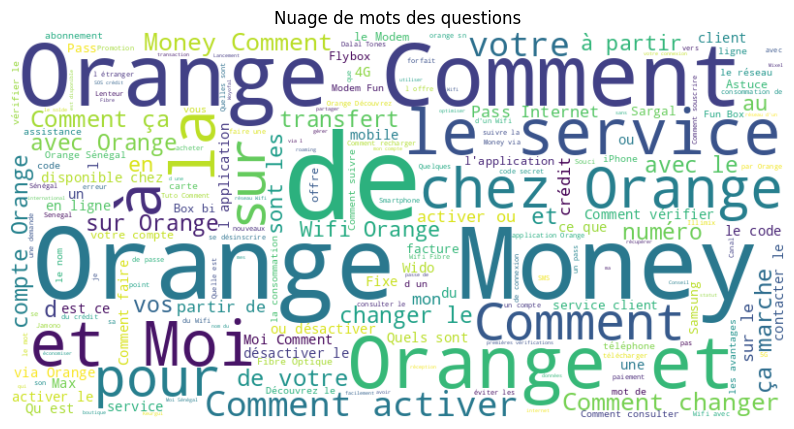

In [57]:
# Un nuage de mots pour les questions
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Générer le texte pour le nuage de mots
all_questions = ' '.join(df['question'])

# Créer un nuage de mots
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_questions)

# Visualiser le nuage de mots
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nuage de mots des questions')
plt.show()


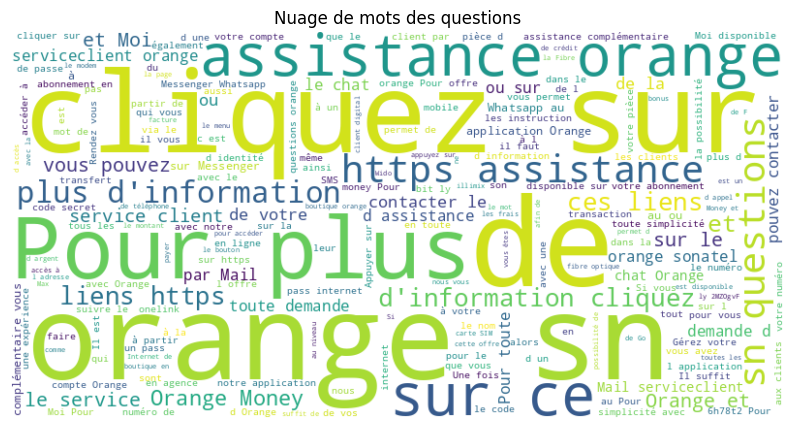

In [58]:
# Un nuage de mots pour les questions
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Générer le texte pour le nuage de mots
all_questions = ' '.join(df['answer'])

# Créer un nuage de mots
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_questions)

# Visualiser le nuage de mots
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nuage de mots des questions')
plt.show()


In [59]:
# Vérifier les doublons sur toutes les colonnes
doublons = df.duplicated()
# Afficher les lignes en doublon
lignes_doublons = df[doublons]
lignes_doublons

,question,answer
529,Découvrez la 5G avec Orange : Profitez de la M...,Pour célébrer le lancement tant attendu de nos...


In [60]:
# Vérifier les doublons uniquement pour la colonne 'question'
doublons_question = df["question"].duplicated()

# Afficher les lignes avec des doublons sur la colonne 'question'
lignes_doublons_question = df[doublons_question]
lignes_doublons_question

,question,answer
522,"Le Tecno Camon 30, disponible chez Orange !",Le Tecno Camon 30 est désormais disponible che...
529,Découvrez la 5G avec Orange : Profitez de la M...,Pour célébrer le lancement tant attendu de nos...
540,"Les Samsung S24, S24+ et S24 Ultra débarquent ...","Les nouveaux Samsung S24, S24+ et S24 Ultra so..."
544,Orange Money célèbre le Ramadan avec des Ndogo...,"Du 08 Mars au 11 Avril, Orange récompense la f..."
545,Orange Money célèbre le Ramadan avec des Ndogo...,Il vous suffit de réaliser des transactions su...
548,Découvrez le renouveau du milieu de gamme Sams...,Plongez dans une expérience immersive avec les...
577,Nouveau Nola XL chez Orange: Un Smartphone Ter...,Orange vous présente fièrement le tout nouveau...
600,Tecno Camon 20 et Camo Tecno Camon 20 et Camo...,Tecno Camon 20 à partir de 114.000 et Camon 2...
638,Vers quelles destinations Peut-on appeler avec...,"La promotion ""Bonus Toutes Destinations"", init..."
640,Contacter le SAMU 1515 sur Iphone,"Désormais, c’est possible pour tout client uti..."


In [61]:
# Vérifier les doublons uniquement pour la colonne 'answer'
doublons_answer = df["answer"].duplicated()

# Afficher les lignes avec des doublons sur la colonne 'answer'
lignes_doublons_answer = df[doublons_answer]
lignes_doublons_answer

,question,answer
494,Découvrez le Tecno Pop 9 en Crédit dans nos Ag...,\n\nLe...
529,Découvrez la 5G avec Orange : Profitez de la M...,Pour célébrer le lancement tant attendu de nos...
614,Comment consulter le solde du crédit fixe au #...,Pour consulter le solde du crédit fixe au #14...
655,Comment ouvrir un compte Orange Money avec l&#...,
656,Comment télécharger une facture d&#039;une lig...,
657,Comment télécharger une facture mobile avec Or...,
731,Le service PlayWing Store: Comment ça marche?,Gameloft est un portail mobile de jeux accessi...
757,Comment changer le code d&#039;un Wifi avec le...,
758,Comment changer le nom le réseau d&#039;un Wif...,
759,Comment masquer le réseau d&#039;un Wifi avec ...,


In [62]:
# Supprimer les lignes où la colonne 'answer' contient une chaîne vide
df = df[df['answer'].str.strip() != ""]

In [63]:
# Vérifier les doublons uniquement pour la colonne 'response'
doublons_answer = df["answer"].duplicated()

# Afficher les lignes avec des doublons sur la colonne 'question'
lignes_doublons_answer = df[doublons_answer]
lignes_doublons_answer

,question,answer
494,Découvrez le Tecno Pop 9 en Crédit dans nos Ag...,\n\nLe...
529,Découvrez la 5G avec Orange : Profitez de la M...,Pour célébrer le lancement tant attendu de nos...
614,Comment consulter le solde du crédit fixe au #...,Pour consulter le solde du crédit fixe au #14...
731,Le service PlayWing Store: Comment ça marche?,Gameloft est un portail mobile de jeux accessi...
769,Déblocage code secret OM via l&#039;application,Votre compte Orange Money est bloqué ? Vous po...


In [64]:
# Filtrer les questions sans réponses
no_answer_data = df[df['answer'].isnull() | (df['answer'] == '')]

# Nombre de questions sans réponse
print("Nombre de questions sans réponse :", len(no_answer_data))


Nombre de questions sans réponse : 0


In [65]:
from html import unescape
import re

# Fonction pour nettoyer le texte
def nettoyer_texte(texte):
    if pd.isna(texte):  # Gérer les valeurs manquantes
        return ""
    texte = unescape(texte)  # Convertir les entités HTML en texte normal
    texte = re.sub(r'\s+', ' ', texte)  # Remplacer les espaces multiples et sauts de ligne
    texte = re.sub(r'\.{2,}', '.', texte)  # Remplacer "..." par un seul "."
    texte = texte.strip()  # Supprimer les espaces en début/fin
    return texte

# Appliquer le nettoyage sur chaque colonne
df["question"] = df["question"].apply(nettoyer_texte)
df["answer"] = df["answer"].apply(nettoyer_texte)


<ipython-input-65-9de85cabe533>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["question"] = df["question"].apply(nettoyer_texte)
<ipython-input-65-9de85cabe533>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["answer"] = df["answer"].apply(nettoyer_texte)


In [66]:
df

,question,answer
0,Formulaire Orange,Formulaire abonnement Fibre Orange 220803-CC-F...
1,Guide d'utilisation #1413# Orange Senegal,Guide d'utilisation #1413# Orange Senegal Guid...
2,Comment activer la garantie Samsung E Warranty,Pour s’enregistrer sur Ewarranty afin de bénéf...
3,Contacter le SAMU 1515 sur Iphone,"Désormais, c’est possible pour tout client uti..."
4,Orange Energie avec Kit wifi (Box bi),Orange offre la possibilité aux habitants des ...
...,...,...
773,Point sargal : Je veux convertir mes points Sa...,Un large choix de cadeaux vous est offert au #...
774,Compte sargal : Comment m’inscrire au programm...,La souscription au programme de fidélité Sarga...
775,Comment changer le mot de passe de mon adminis...,1 Modem ZTE Accédez à l’interface du modem via...
776,Comment recharger mon compteur Woyofal ?,Si vous décidez de ne pas activer de domicilia...


In [67]:
df.to_csv('dataa.csv', index=False)